TODO:
- не забыть нововведения в eda_basic перенести в соответствующий файл

# Исследовательский анализ данных

Данные по бронированию номеров. Вроде, [отсюда](https://www.kaggle.com/datasets/moro146/hotel-bookings).

Описания там нет. Так что мои предположения:  
|номер|колонка|non-null|тип|описание|
|--|--|--|--|--|
 |2|   lead_time           |            119390 non-null | int64 |  за сколько дней до прибытия был забронирован номер  |
| 20 | assigned_room_type   |           119390 non-null | object |  тип комнаты на самом деле занятый (а не зарезервированный)  |
| 23 | agent                  |         103050 non-null | Int64 |  агент по бронированию? Сотрудник?  |
| 24 | company                 |        6797 non-null   | Int64 |  ?  |
| 27 | adr                   |          119390 non-null | float64 |  средняя стоимость за ночь  |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Считывание данных

In [3]:
df = pd.read_csv('./data_ignored/hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df = df.convert_dtypes()

In [8]:
df.reservation_status_date = df.reservation_status_date.astype('datetime64[ns]')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  string        
 1   is_canceled                     119390 non-null  Int64         
 2   lead_time                       119390 non-null  Int64         
 3   arrival_date_year               119390 non-null  Int64         
 4   arrival_date_month              119390 non-null  string        
 5   arrival_date_week_number        119390 non-null  Int64         
 6   arrival_date_day_of_month       119390 non-null  Int64         
 7   stays_in_weekend_nights         119390 non-null  Int64         
 8   stays_in_week_nights            119390 non-null  Int64         
 9   adults                          119390 non-null  Int64         
 10  children                        119386 non-null  Int64  

In [13]:
df.dtypes.unique()

array([string[python], Int64Dtype(), Float64Dtype(), dtype('<M8[ns]')],
      dtype=object)

In [74]:
df.describe(include=int)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119390.0,119386.0,119390.0,119390.0,119390.0,119390.0,119390.0,103050.0,6797.0,119390.0,119390.0,119390.0
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.10389,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798
min,0.0,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0
25%,0.0,18.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,62.0,0.0,0.0,0.0
50%,0.0,69.0,2016.0,28.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,179.0,0.0,0.0,0.0
75%,1.0,160.0,2017.0,38.0,23.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,270.0,0.0,0.0,1.0
max,1.0,737.0,2017.0,53.0,31.0,19.0,50.0,55.0,10.0,10.0,1.0,26.0,72.0,21.0,535.0,543.0,391.0,8.0,5.0


Пропуски значений только по агентам - они не всегда же есть.  
Ладно 19 уикэндов провести, но провести 50 рабочих недель без уикендов...  
Проверить еще до 55 взрослых, 10 детей и 10 младенцев в одном номере.  
required_car_parking_spaces до 8. Проверить. Хотя кто-то гостям мог заказать?  
какие номера ждали люди с большими days_in_waiting_list?

In [82]:
df.describe(include=float)

,adr
count,119390.0
mean,101.831122
std,50.53579
min,-6.38
25%,69.29
50%,94.575
75%,126.0
max,5400.0


Отрицательный adr? Надо будет почистить.

In [84]:
df.describe(include='string')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


Не по всем посетителям есть страна.  
assigned_room_type на 2 больше, чем reserved_room_type

In [80]:
df.describe(include='datetime64')

,reservation_status_date
count,119390
mean,2016-07-30 00:24:47.883407104
min,2014-10-17 00:00:00
25%,2016-02-01 00:00:00
50%,2016-08-07 00:00:00
75%,2017-02-08 00:00:00
max,2017-09-14 00:00:00


## Создание колонок

In [25]:
# колонка полной даты
df['arrival_date'] = pd.to_datetime(
                            df.arrival_date_year.astype(str) 
                            + '-' 
                            + df.arrival_date_month 
                            + '-' + df.arrival_date_day_of_month.astype(str)
                        )

In [27]:
# номер месяца
df['arrival_date_month_number'] = df.arrival_date.dt.month

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  string        
 1   is_canceled                     119390 non-null  Int64         
 2   lead_time                       119390 non-null  Int64         
 3   arrival_date_year               119390 non-null  Int64         
 4   arrival_date_month              119390 non-null  string        
 5   arrival_date_week_number        119390 non-null  Int64         
 6   arrival_date_day_of_month       119390 non-null  Int64         
 7   stays_in_weekend_nights         119390 non-null  Int64         
 8   stays_in_week_nights            119390 non-null  Int64         
 9   adults                          119390 non-null  Int64         
 10  children                        119386 non-null  Int64  

## Обработка пропущенных значений

In [52]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
previous_bookings_not_canceled         0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
arrival_date                           0
reserved_room_type                     0
previous_cancellations                 0
is_canceled                            0
is_repeated_guest                      0
distribution_channel                   0
market_segment                         0
meal                                   0
babies          

In [55]:
df.isnull().mean().sort_values(ascending=False)

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
hotel                             0.000000
previous_bookings_not_canceled    0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
reservation_status                0.000000
reservation_status_date           0.000000
arrival_date                      0.000000
reserved_room_type                0.000000
previous_cancellations            0.000000
is_canceled                       0.000000
is_repeated_guest                 0.000000
distribution_channel              0.000000
market_segment                    0.000000
meal       

4 неизвестных значения в поле children заменю на 0:

In [59]:
df.children = df.children.fillna(0)

488-ми посетителям назначим страну 'UNK'nown:

In [65]:
df.country = df.country.fillna('UNK')

Отсутствие агента и компании - обычное дело, похоже. Обрабатывать отсутствие этих значений не буду.

## Работа с дубликатами

In [7]:
# дуплицированные заказы
df_duplicated = df[df.duplicated(keep=False)]

In [8]:
# недуплицированные заказы
df_single = df[~df.duplicated(keep=False)]

In [8]:
# проверим себя, что никого не потеряли
df_single.shape[0] + df_duplicated.shape[0] == df.shape[0]

True

In [77]:
# количество и доля дубликатов в системе
df.duplicated().sum(), df.duplicated(keep=False).sum(), df.duplicated(keep=False).mean()

(31994, 40165, 0.3364184605075802)

In [89]:
df_duplicated[60:70]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_date_month_number
634,Resort Hotel,0,8,2015,July,30,24,0,2,2,0,0,BB,BRA,Online TA,TA/TO,0,0,0,D,F,0,No Deposit,240,<NA>,0,Transient-Party,173.0,0,2,Check-Out,2015-07-26,2015-07-24,7
636,Resort Hotel,0,22,2015,July,30,24,0,2,2,0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,<NA>,0,Transient-Party,153.0,0,2,Check-Out,2015-07-26,2015-07-24,7
638,Resort Hotel,0,22,2015,July,30,24,0,2,2,0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,<NA>,0,Transient-Party,153.0,0,2,Check-Out,2015-07-26,2015-07-24,7
640,Resort Hotel,0,22,2015,July,30,24,0,2,2,0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,<NA>,0,Transient-Party,153.0,0,2,Check-Out,2015-07-26,2015-07-24,7
643,Resort Hotel,0,8,2015,July,30,24,0,2,2,0,0,BB,BRA,Online TA,TA/TO,0,0,0,D,F,0,No Deposit,240,<NA>,0,Transient-Party,173.0,0,2,Check-Out,2015-07-26,2015-07-24,7
644,Resort Hotel,1,67,2015,July,30,24,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,<NA>,0,Transient,135.0,0,1,Canceled,2015-07-06,2015-07-24,7
647,Resort Hotel,1,67,2015,July,30,24,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,<NA>,0,Transient,135.0,0,1,Canceled,2015-07-06,2015-07-24,7
654,Resort Hotel,0,55,2015,July,30,24,2,3,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,147,<NA>,0,Transient-Party,75.44,0,1,Check-Out,2015-07-29,2015-07-24,7
655,Resort Hotel,0,55,2015,July,30,24,2,3,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,147,<NA>,0,Transient-Party,75.44,0,1,Check-Out,2015-07-29,2015-07-24,7
660,Resort Hotel,0,25,2015,July,30,24,2,6,2,0,0,BB,PRT,Direct,TA/TO,0,0,0,D,D,0,No Deposit,240,<NA>,0,Transient,154.0,0,2,Check-Out,2015-08-01,2015-07-24,7


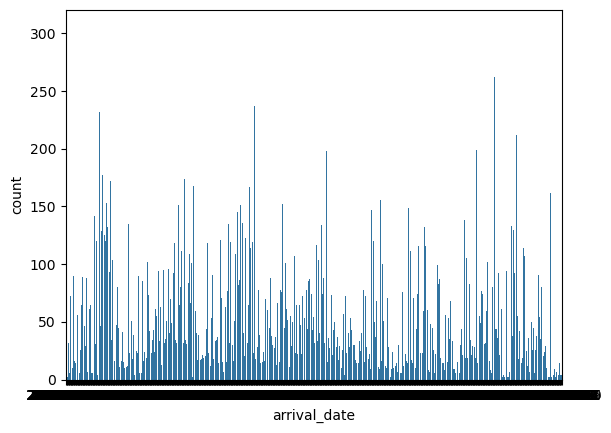

In [68]:
sns.countplot(data=df_duplicated, x='arrival_date');

У посетителей из какой страны наибольшее соотношение дуплицированных бронирований к одиночным?

In [ ]:
(
    (
        df_duplicated.country.value_counts(normalize=True) 
        / df_single.country.value_counts(normalize=True)
    )
    .sort_values(ascending=False)
    .head(20)
)

country
BOL    17.752396
TJK    15.779908
BRB     5.917465
GGY     3.944977
FRO     2.958733
ISL     2.915853
SRB      2.35841
ISR     1.990259
PRT     1.977691
MAC     1.972488
GTM     1.972488
IRQ     1.479366
IDN     1.314992
THA     1.260201
SVK     1.080172
SVN      1.06621
AUT     1.047212
VEN     1.044259
HKG     1.038152
DEU     1.025118
Name: proportion, dtype: Float64

Из каких стран больше всего посетителей?

In [ ]:
df.country.value_counts(normalize=True).head(20)

country
PRT    0.406986
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
ITA    0.031544
IRL    0.028269
BEL    0.019616
BRA    0.018628
NLD    0.017623
USA    0.017564
CHE     0.01449
CN     0.010713
AUT    0.010579
SWE    0.008577
CHN    0.008368
POL    0.007697
ISR    0.005603
RUS    0.005294
NOR    0.005084
Name: proportion, dtype: Float64

Доля дубликатов для семей с разным количеством детей:

In [84]:
feature = 'children'
df_duplicated.groupby(feature).hotel.count() / df.groupby(feature).hotel.count()

children
0     0.358736
1     0.062127
2     0.030942
3     0.026316
10         NaN
Name: hotel, dtype: float64

Доля дубликатов для номеров разного типа:

In [ ]:
feature = 'reserved_room_type'
(
    (
        df_duplicated.groupby(feature).hotel.count() 
        / df.groupby(feature).hotel.count()
    )
    .sort_values(ascending=False)
)

reserved_room_type
P    0.750000
A    0.418901
B    0.204830
D    0.149003
E    0.120888
F    0.047635
G    0.037249
C    0.030043
H    0.014975
L         NaN
Name: hotel, dtype: float64

Средняя стоимость номера по типам:

In [12]:
df.groupby(feature).adr.mean()

reserved_room_type
A     90.796658
B     90.360447
C    160.216792
D    120.682882
E    124.540179
F    167.689651
G    175.996027
H    188.223111
L    124.666667
P           0.0
Name: adr, dtype: Float64

Непонятно, что делать с дубликатами, не зная особенностей функционирования системы.  
Доля дублей - треть. Слишком много для ошибок?  
Многие дубли соседствуют, многие через одну-две строки друг от друга. Есть целые серии дублей. 
Может на свадьбу гостям номера заказали? Как часто люди путешествуют парой семей?  
Борьбы с ошибками не видно: со временем они снижаются, но не кардинально.  
Дублей много, например, у португальцеыв. А они - 40% бронирующих. Особенности внутреннего туризма?  
Есть другие группы, имеющие бОльшую долю дублей: редко это бронирования с детьми, чаще это дешевые комнаты. 
Неочевидно почему в этих группах должны быть чаще ошибки.  
Решение: не буду удалять дубли.

## Обработка сомнительных значений

Что делать с резервированием "резиновых" номеров? На 55 взрослых, например. 
Случалось это 16 раз только с резервированием на сентябрь-октябрь 2015 в Resort Hotel. Какие-то особенности "учета"? Все были отменены, 14 из них отменены 02/01/2015.  
Удалю эти 16 строк.

In [20]:
df[df.adults > 4]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_date_month_number
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,<NA>,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-03,9
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-05,9
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,<NA>,<NA>,0,Group,0.0,0,0,Canceled,2015-01-18,2015-09-07,9
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-12,9
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-19,9
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,<NA>,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-21,9
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,<NA>,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-24,9
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-09-26,9
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-10-03,10
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,<NA>,<NA>,0,Group,0.0,0,0,Canceled,2015-01-02,2015-10-04,10


In [7]:
df.shape[0]

119390

In [8]:
df = df.loc[df.adults <= 4]

In [9]:
df.shape[0]

119374

Посмотрим количество детей:

In [ ]:
df.children.value_counts()

children
0     110784
1       4861
2       3652
3         76
10         1
Name: count, dtype: Int64

История с 10 детьми кажется странной. Удалю:

In [10]:
df.shape[0]

119374

In [11]:
df = df[df.children < 4]

In [12]:
df.shape[0]

119373

То же с 9 и 10 младенцами:

In [ ]:
df.babies.value_counts()

babies
0     118456
1        900
2         15
10         1
9          1
Name: count, dtype: Int64

In [16]:
df.shape[0]

119373

In [17]:
df = df[df.babies < 3]

In [18]:
df.shape[0]

119371

Непонятные номера типа L и P. Выдавались какими-то временными отрезками. Не буду удалять:

In [32]:
df.reserved_room_type.value_counts()

reserved_room_type
A    85981
D    19197
E     6533
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: Int64

Не буду удалять и строки с резервирование паркинга на 3 и  8 мест:

In [47]:
df.required_car_parking_spaces.value_counts(dropna=False)

required_car_parking_spaces
0    111955
1      7383
2        28
3         3
8         2
Name: count, dtype: Int64

In [27]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,arrival_date_month_number
count,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,119371.0,103042.0,6797.0,119371.0,119371.0,119371.0,119371.0,119371,119371,119371.000000
mean,0.370333,103.981872,2016.15673,27.163591,15.798971,0.92747,2.500038,1.853348,0.103819,0.007791,0.031917,0.087132,0.137119,0.221117,86.694367,189.266735,2.321519,101.844711,0.062528,0.571437,2016-07-30 02:23:09.985842688,2016-08-28 17:56:34.261587968,6.552102
min,0.0,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,-6.38,0.0,0.0,2014-10-17 00:00:00,2015-07-01 00:00:00,1.000000
25%,0.0,18.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,62.0,0.0,69.29,0.0,0.0,2016-02-02 00:00:00,2016-03-13 00:00:00,4.000000
50%,0.0,69.0,2016.0,28.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,179.0,0.0,94.62,0.0,0.0,2016-08-07 00:00:00,2016-09-06 00:00:00,7.000000
75%,1.0,160.0,2017.0,38.0,23.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,270.0,0.0,126.0,0.0,1.0,2017-02-08 00:00:00,2017-03-18 00:00:00,9.000000
max,1.0,737.0,2017.0,53.0,31.0,19.0,50.0,4.0,3.0,2.0,1.0,26.0,72.0,21.0,535.0,543.0,391.0,5400.0,8.0,5.0,2017-09-14 00:00:00,2017-08-31 00:00:00,12.000000
std,0.482896,106.836689,0.70739,13.60521,8.780924,0.998583,1.908142,0.488802,0.397554,0.089339,0.175781,0.844403,1.497555,0.652321,110.77829,131.655015,17.596097,50.525947,0.245309,0.79283,NaN,NaN,3.090613


Одно огромное число (5400) в adr. Уберем эту строку. Другие большие числа (>400) имеются, хотя и в небольшом количестве - оставлю их. Так же, как небольшие adr - таких десятки, нулевые - таких пара тысяч (программы для "своих"?). Но строку с отрицательным adr удалю.

In [48]:
df = df[df.adr < 1000]

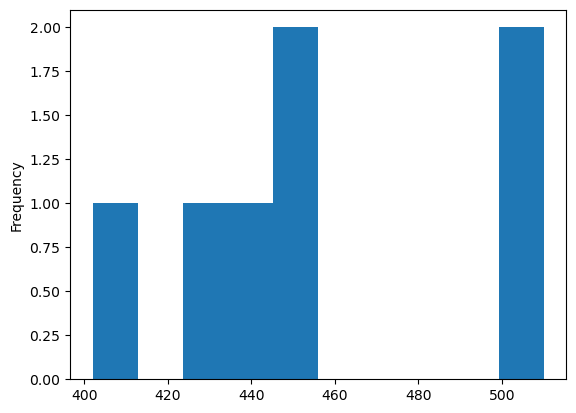

In [54]:
df.adr[df.adr > 400].plot.hist();

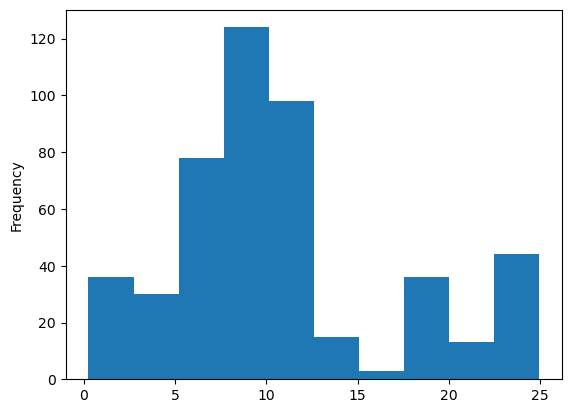

In [61]:
df.adr[(df.adr < 25) & (df.adr > 0) ].plot.hist();

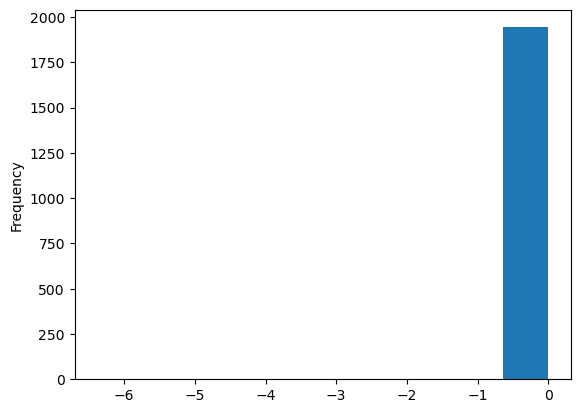

In [63]:
df.adr[df.adr <= 0].plot.hist();

In [65]:
df[df.adr < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_date_month_number
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273,<NA>,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05,3


In [66]:
df = df[df.adr >= 0]

In [67]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_date_month_number
13373,Resort Hotel,1,269,2017,August,32,12,2,5,2,1,0,HB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,15,<NA>,0,Transient,162.0,0,0,Canceled,2017-07-28,2017-08-12,8
58921,City Hotel,1,63,2016,October,43,17,1,3,2,2,0,BB,DEU,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9,<NA>,0,Transient,190.8,0,3,Canceled,2016-10-16,2016-10-17,10
78110,City Hotel,0,10,2015,October,40,1,0,3,1,0,0,BB,ITA,Direct,Direct,0,0,0,A,A,0,No Deposit,14,<NA>,0,Transient,159.67,0,0,Check-Out,2015-10-04,2015-10-01,10
38203,Resort Hotel,0,278,2017,July,27,5,2,5,2,0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,<NA>,0,Transient,108.24,0,1,Check-Out,2017-07-12,2017-07-05,7
60717,City Hotel,1,44,2016,November,47,19,0,1,0,2,0,BB,PRT,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9,<NA>,0,Transient,82.44,0,2,Canceled,2016-10-27,2016-11-19,11


In [68]:
# экспресс
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('./data_ignored/hotel_bookings.csv')

df = df.convert_dtypes()

df.reservation_status_date = df.reservation_status_date.astype('datetime64[ns]')

df['arrival_date'] = pd.to_datetime(
                            df.arrival_date_year.astype(str) 
                            + '-' 
                            + df.arrival_date_month 
                            + '-' + df.arrival_date_day_of_month.astype(str)
                        )
df['arrival_date_month_number'] = df.arrival_date.dt.month

df.children = df.children.fillna(0)
df.country = df.country.fillna('UNK')
df = df.loc[df.adults <= 4]
df = df[df.children < 4]
df = df[df.babies < 3]
df = df[df.adr < 1000]
df = df[df.adr >= 0]